# Import libaries

In [1]:
import pandas as pd
from pandas_datareader import wb

# Chosen a CO2 emissions and copy the URL link from the worldbank

In [2]:
data_access="EN.ATM.CO2E.LF.ZS"

# Chosen second CO2 emissions and copy the URL link from the worldbank

In [3]:
renewable_data="EN.ATM.CO2E.KT"

# Used some country codes

In [4]:
countries=['US', 'CA', 'MX','USA','CHN','JPN']

# Show the first data link values

In [5]:
df=wb.download(indicator=data_access,country=countries,start=2016,end=2020)
df

EN.ATM.CO2E.LF.ZS
country       year                   
Canada        2020                NaN
              2019                NaN
              2018                NaN
              2017                NaN
              2016          45.876136
China         2020                NaN
              2019                NaN
              2018                NaN
              2017                NaN
              2016          13.616829
Japan         2020                NaN
              2019                NaN
              2018                NaN
              2017                NaN
              2016          37.786638
Mexico        2020                NaN
              2019                NaN
              2018                NaN
              2017                NaN
              2016          52.706860
United States 2020                NaN
              2019                NaN
              2018                NaN
              2017                NaN
              2016          43.510145

# Show the second data link values

In [6]:
df1=wb.download(indicator=renewable_data,country=countries,start=2016,end=2020)
df1

EN.ATM.CO2E.KT
country       year                
Canada        2020             NaN
              2019             NaN
              2018        574400.0
              2017        562260.0
              2016        550480.0
China         2020             NaN
              2019             NaN
              2018      10313460.0
              2017      10017770.0
              2016       9814310.0
Japan         2020             NaN
              2019             NaN
              2018       1106150.0
              2017       1151930.0
              2016       1171390.0
Mexico        2020             NaN
              2019             NaN
              2018        472140.0
              2017        471810.0
              2016        479250.0
United States 2020             NaN
              2019             NaN
              2018       4981300.0
              2017       4813720.0
              2016       4888640.0

# Merge two data link values

In [7]:
df2=df.merge(df1,on='country')
df2

,EN.ATM.CO2E.LF.ZS,EN.ATM.CO2E.KT
country,,
Canada,NaN,NaN
Canada,NaN,NaN
Canada,NaN,574400.0
Canada,NaN,562260.0
Canada,NaN,550480.0
...,...,...
United States,43.510145,NaN
United States,43.510145,NaN
United States,43.510145,4981300.0


In [8]:
df2.columns=["data_access (%)", "renewable_data (kwh)"]
df2

,data_access (%),renewable_data (kwh)
country,,
Canada,NaN,NaN
Canada,NaN,NaN
Canada,NaN,574400.0
Canada,NaN,562260.0
Canada,NaN,550480.0
...,...,...
United States,43.510145,NaN
United States,43.510145,NaN
United States,43.510145,4981300.0


# Data Visualization

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, Canada to United States
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   data_access (%)       25 non-null     float64
 1   renewable_data (kwh)  75 non-null     float64
dtypes: float64(2)
memory usage: 2.9+ KB


In [10]:
df2.isnull().sum()

data_access (%)         100
renewable_data (kwh)     50
dtype: int64

In [11]:
df2 = df2.fillna(0)

In [12]:
df2.isnull().sum()

data_access (%)         0
renewable_data (kwh)    0
dtype: int64

In [13]:
df2.describe()

,data_access (%),renewable_data (kwh)
count,125.000000,1.250000e+02
mean,7.739864,2.054760e+06
std,16.669675,3.329510e+06
min,0.000000,0.000000e+00
25%,0.000000,0.000000e+00
50%,0.000000,4.792500e+05
75%,0.000000,1.171390e+06
max,52.706860,1.031346e+07


In [14]:
df2.dtypes

data_access (%)         float64
renewable_data (kwh)    float64
dtype: object

# create a bar plot used to first data link values

<AxesSubplot:title={'center':'CO2 acess rate in 2016'}, xlabel='country'>

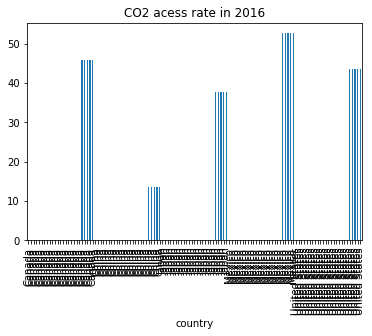

In [15]:
import matplotlib.pyplot as plt
plt.title("CO2 acess rate in 2016")
df2["data_access (%)"].plot(kind="bar")

# create a histogram plot used to second data link values

<AxesSubplot:title={'center':'CO2 acess rate in 2020'}, ylabel='Frequency'>

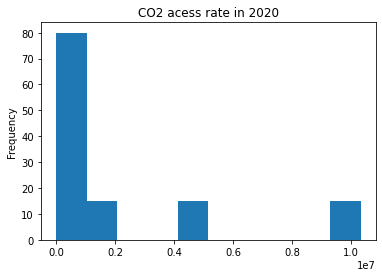

In [16]:
import matplotlib.pyplot as plt
plt.title("CO2 acess rate in 2020")
df2["renewable_data (kwh)"].plot(kind="hist")

In [17]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


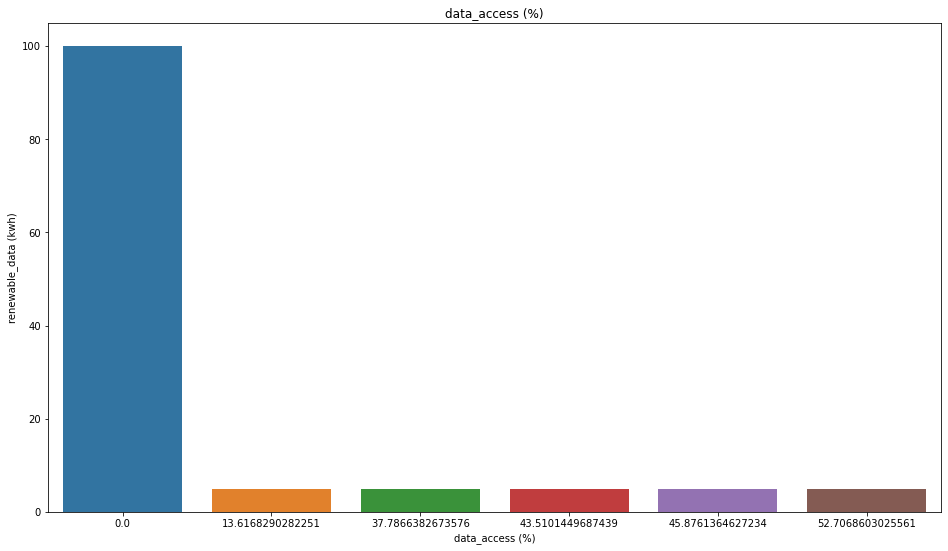

In [18]:
plt.figure(figsize=(16,9))
sns.countplot(df2['data_access (%)'])
plt.title('data_access (%)',color="black")
plt.xlabel("data_access (%)")
plt.ylabel("renewable_data (kwh)")
plt.show()

# Box plot

<AxesSubplot:xlabel='data_access (%)', ylabel='renewable_data (kwh)'>

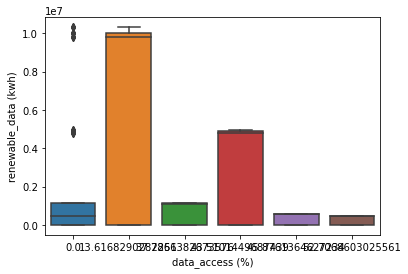

In [19]:
sns.boxplot(y="renewable_data (kwh)",x="data_access (%)", data=df2)

# Statistical tools

In [20]:
df2["renewable_data (kwh)"].mean()

2054760.4

In [21]:
df2["renewable_data (kwh)"].count()

125

In [22]:
df2["renewable_data (kwh)"].median()

479250.0

In [23]:
df2["renewable_data (kwh)"].max()

10313460.0

In [24]:
df2["data_access (%)"].mean()

7.739864361184247

In [25]:
df2["data_access (%)"].count()

125

In [26]:
df2["data_access (%)"].max()

52.7068603025561